In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
#Read data from tab-separated values
df_titan = pd.read_csv('titanic.csv', sep='\t')

## I. Data Cleaning

In [6]:
#Display 5 first rows
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#types of variables
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [9]:
#sum of non-available data
df_titan.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [13]:
#Filtering all entries where embarked is not non-available
df_titan = df_titan[df_titan.Embarked.notna()]

#Rechecking the non-available
df_titan.isna().sum()

#Rechecking all informations
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    155 non-null int64
Survived       155 non-null int64
Pclass         155 non-null int64
Name           155 non-null object
Sex            155 non-null object
Age            125 non-null float64
SibSp          155 non-null int64
Parch          155 non-null int64
Ticket         155 non-null object
Fare           155 non-null float64
Cabin          30 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 15.7+ KB


In [14]:
#Replace missing ages with average of ages
df_titan['Age'] = df_titan['Age'].fillna(np.mean(df_titan['Age']))

In [15]:
#Group cabin size
df_titan.groupby(['Cabin']).size().to_frame().sort_values(by=[0], ascending=True)

,0
Cabin,
A5,1
F2,1
F G73,1
F E69,1
E46,1
E31,1
E101,1
D56,1
D47,1


In [17]:
#Fill all null cells of 'Cabin' with 'NA' because it's too much to have its rows eliminated
df_titan['Cabin'] = df_titan['Cabin'].fillna('NA')

#Rechecking all informations
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    155 non-null int64
Survived       155 non-null int64
Pclass         155 non-null int64
Name           155 non-null object
Sex            155 non-null object
Age            155 non-null float64
SibSp          155 non-null int64
Parch          155 non-null int64
Ticket         155 non-null object
Fare           155 non-null float64
Cabin          155 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 15.7+ KB


## II. Exploratory Data Analysis

In [19]:
# Descriptives
df_titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.606452,0.341935,2.432258,28.062640,0.619355,0.400000,27.774810
std,45.304238,0.475896,0.789701,13.142011,1.058491,0.872375,39.305546
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.977100
50%,79.000000,0.000000,3.000000,28.062640,0.000000,0.000000,14.454200
75%,117.500000,1.000000,3.000000,32.750000,1.000000,0.000000,30.070800
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


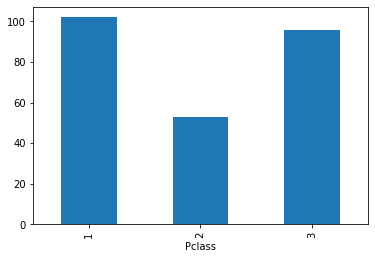

In [23]:
# Group by variables and plot bar diagram for count

#Survived
df_titan.groupby(['Survived']).PassengerId.count().plot(kind='bar')


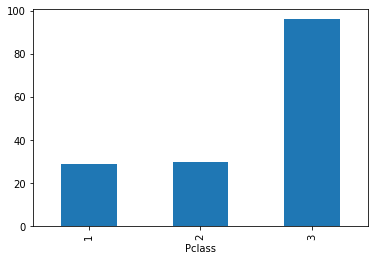

In [24]:
#Pclass
df_titan.groupby(['Pclass']).PassengerId.count().plot(kind='bar')

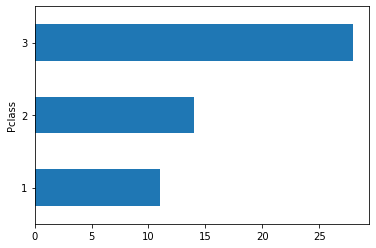

In [25]:
#Pclass and survived
df_titan[df_titan.Survived == 1].groupby(['Pclass']).PassengerId.count().plot(kind='barh')

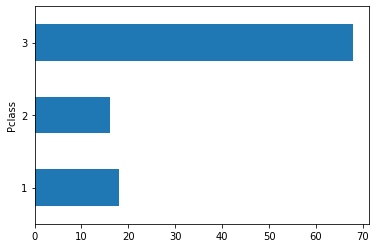

In [26]:
#Pclass and survived
df_titan[df_titan.Survived == 0].groupby(['Pclass']).PassengerId.count().plot(kind='barh')

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [34]:
mc = MultiComparison(df_titan['Survived'], df_titan['Pclass'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0874 0.7397 -0.2047 0.3794  False
     1      3  -0.0876 0.6454 -0.3253   0.15  False
     2      3   -0.175 0.1848 -0.4096 0.0596  False
---------------------------------------------------
